#                        P4 : Etude de santé publique
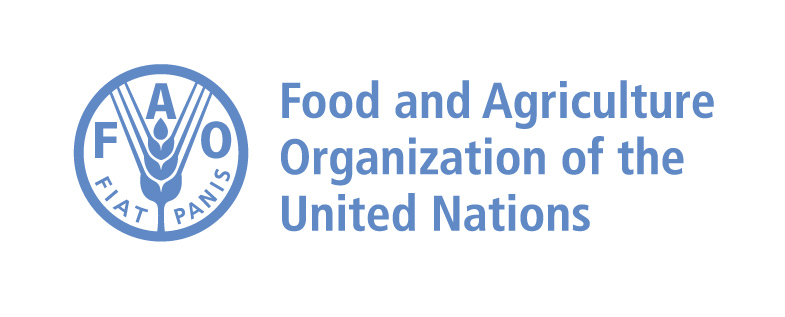

* Import des librairies nécessaires à l'études des données

In [1]:
import pandas as pd             # Pour la structure des données et feuilles de calcul
import matplotlib.pyplot as plt        # Pour les graphiques
import seaborn as sns
import numpy as np               # Pour utiliser les tableaux

* Lecture des fichiers CSV

In [2]:
population = pd.read_csv('C:\\Users\\NK\\Desktop\\P4\\population.csv',sep = ',')
aide_alimentaire = pd.read_csv('C:\\Users\\NK\\Desktop\\P4\\aide_alimentaire.csv',sep = ',')
sous_nutrition = pd.read_csv('C:\\Users\\NK\\Desktop\\P4\\sous_nutrition.csv',sep = ',')
dispo_alimentaire = pd.read_csv('C:\\Users\\NK\\Desktop\\\P4\\dispo_alimentaire.csv',sep = ',')

* Check des Dataframes

In [3]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [4]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [5]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [6]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


* Nettoyages des données des tables

 *Table sous_nutrition* :

In [7]:
                        # Création de la copie de la table sous_nutrition que l'on va modifier
    
sous_nutrition_copy = sous_nutrition

                        # division de la colonne Année de la table sous_nutrition en 2 colonnes distinctes

sous_nutrition_copy["Année_moyenne"],sous_nutrition_copy["Annee_fin"] = sous_nutrition_copy['Année'].str.split("-",1).str

                        # modification du type de cette colonne en int

sous_nutrition_copy = sous_nutrition_copy.astype({"Année_moyenne":int})

                        # suppression de la colonne Annee_fin et Année

del sous_nutrition_copy["Annee_fin"]
del sous_nutrition_copy["Année"]

                        # +1 sur la colonne Annee_moyenne

sous_nutrition_copy["Année_moyenne"]+=1

                        
                        # Remplace les valeur=<0.1 par O.O5 pour pouvoir convertir "valeur" en float
                        
sous_nutrition_copy["Valeur"] = sous_nutrition_copy["Valeur"].str.replace('<0.1','0.05')
                        
                        # Changement de type de "Valeur" de str à float
                        
sous_nutrition_copy = sous_nutrition_copy.astype({"Valeur":float})

                        # renommer la colonne année
    
sous_nutrition_copy = sous_nutrition_copy.rename(columns = {'Année_moyenne' : 'Année'})
                        
                        # création d'une frame copie de sous_nutrition_copy avec valeur null pour cartographie finale
    
df_sous_nutrition = sous_nutrition_copy 

                        # remplacement des valeur null par 0.0
                        
sous_nutrition_copy = sous_nutrition_copy.fillna(value=0.0)                      

C:\Users\NK\AppData\Local\Temp/ipykernel_10896/2812166587.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sous_nutrition_copy["Année_moyenne"],sous_nutrition_copy["Annee_fin"] = sous_nutrition_copy['Année'].str.split("-",1).str
C:\Users\NK\AppData\Local\Temp/ipykernel_10896/2812166587.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  sous_nutrition_copy["Valeur"] = sous_nutrition_copy["Valeur"].str.replace('<0.1','0.05')


*Table dispo_alimentaire* :

In [8]:
                        #Remplacement des valeurs null par 0.0 avec création d'une copy

dispo_alimentaire_copy = dispo_alimentaire.fillna(value=0.0)

#                                                      Partie 1 

### Objectif 1 : Evaluer l'évolution de la sous-nutrition et les aides alimentaires au fil du temps

**A : L'aide alimentaire**

Création de la table regroupant les aides alimentaires par pays : 

In [9]:
aide_alimentaire_evolution = aide_alimentaire.groupby("Année").sum("Valeur")

In [10]:
aide_alimentaire_evolution = aide_alimentaire_evolution.rename(columns = {"Valeur" : "Quantité d'aide alimentaire (T)"})

Création de la colone progression en % :

In [11]:
aide_alimentaire_evolution['Progression_%'] = (aide_alimentaire_evolution["Quantité d'aide alimentaire (T)"]*100)/aide_alimentaire_evolution["Quantité d'aide alimentaire (T)"].iloc[0]

In [12]:
aide_alimentaire_evolution

,Quantité d'aide alimentaire (T),Progression_%
Année,,
2013,4165674,100.000000
2014,3939152,94.562176
2015,2187507,52.512679
2016,743568,17.849885


Création et affichage du graphique de l'évolution de l'aide alimentaire en fonction du temps : 

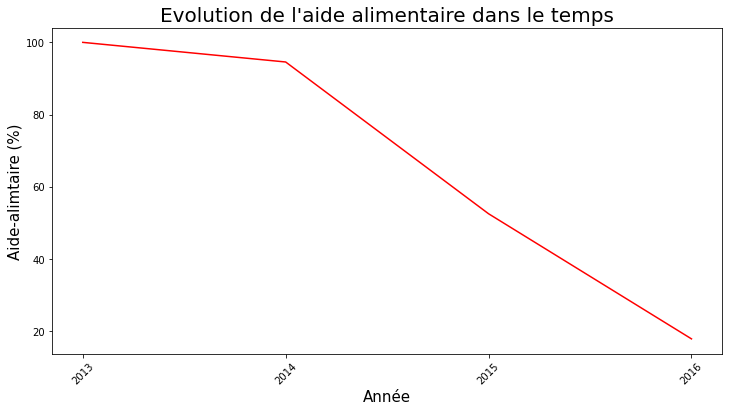

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(['2013','2014','2015','2016'], aide_alimentaire_evolution["Progression_%"], color='r')
ax.set_xlabel('Année', size = 15 ) 
ax.set_ylabel('Aide-alimtaire (%)', size = 15)
plt.title('Evolution de l\'aide alimentaire dans le temps', size = 20)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

**Interprétation : La quantité d'aide alimentaire est en baisse de 2014 à 2016**

**B : La sous-nutrition**

Création de la table regroupant la sous-nutrition par années :

In [14]:
sous_nutrition_evolution = sous_nutrition_copy.groupby("Année").sum("Valeur")

In [15]:
sous_nutrition_evolution['Valeur']*= 10000000 # car en millions de personnes

In [16]:
sous_nutrition_evolution['Progression_%'] = (sous_nutrition_evolution['Valeur']*100)/sous_nutrition_evolution['Valeur'].iloc[5]

In [17]:
sous_nutrition_evolution = sous_nutrition_evolution.rename(columns = {'Valeur':'Population en sous-nutrtition'})

In [18]:
sous_nutrition_evolution

,Population en sous-nutrtition,Progression_%
Année,,
2013,5.291000e+09,97.055856
2014,5.245500e+09,96.221224
2015,5.257000e+09,96.432175
2016,5.296000e+09,97.147574
2017,5.367000e+09,98.449968
2018,5.451500e+09,100.000000


Création et affichage du graphique de l'évolution de la quantité de personnes en sous-nutrition en fonction du temps : 

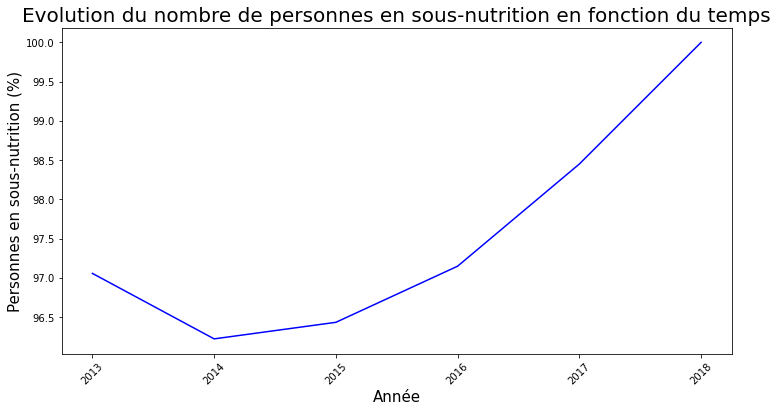

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(['2013','2014','2015','2016','2017','2018'], sous_nutrition_evolution["Progression_%"], color='b')
ax.set_xlabel('Année', size = 15)
ax.set_ylabel('Personnes en sous-nutrition (%)', size = 15)
plt.title('Evolution du nombre de personnes en sous-nutrition en fonction du temps', size = 20)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

**Interpretation : Population en sous-nutrtition en baisse de 2013 à 2014 puis en hausse de 2014 à 2016**

Merge entre l'aide alimentaire et la sous_nutrition :

In [20]:
evolution_aide_nutrition = sous_nutrition_evolution.merge(aide_alimentaire_evolution, on ='Année')

In [21]:
evolution_aide_nutrition

,Population en sous-nutrtition,Progression_%_x,Quantité d'aide alimentaire (T),Progression_%_y
Année,,,,
2013,5.291000e+09,97.055856,4165674,100.000000
2014,5.245500e+09,96.221224,3939152,94.562176
2015,5.257000e+09,96.432175,2187507,52.512679
2016,5.296000e+09,97.147574,743568,17.849885


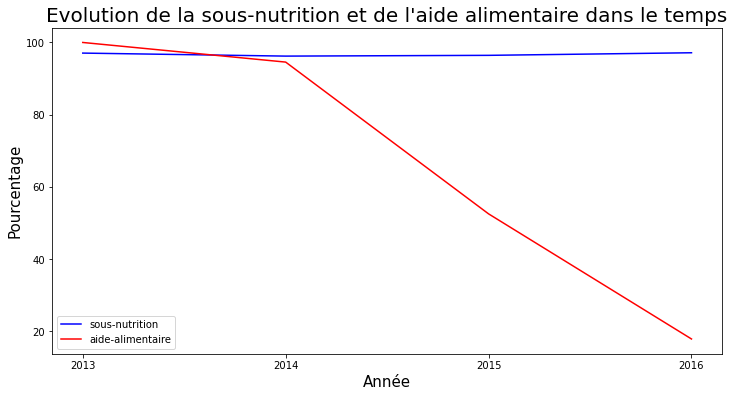

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x= ['2013','2014','2015','2016'], 
             y=evolution_aide_nutrition["Progression_%_x"],

             color='b',
             ax=ax)
sns.lineplot(x=['2013','2014','2015','2016'], 
             y=evolution_aide_nutrition["Progression_%_y"], 
             color='r',
             ax=ax) 

plt.title("Evolution de la sous-nutrition et de l'aide alimentaire dans le temps", size = 20)
ax.set_xlabel('Année', size = 15)
ax.set_ylabel('Pourcentage', size = 15)
ax.legend(['sous-nutrition', 'aide-alimentaire'], facecolor='w')
plt.show()

###  Objectif 2: Evaluer la proportion de personnes en état de sous-nutrition

Tri des tables pour l'an 2017 :

In [23]:
pop_2017 = population[population['Année'] == 2017]

pop_sous_nutrition_2017 = sous_nutrition_copy[sous_nutrition_copy['Année'] == 2017]

Merge des tables pop 2017 et sous nutrition :

In [24]:
pop_2017_sous_nutrition = pop_2017.merge(pop_sous_nutrition_2017, on ="Zone")

Modification des colonnes :

In [25]:
pop_2017_sous_nutrition = pop_2017_sous_nutrition.rename(columns = {'Valeur_x': 'Population_totale', 'Valeur_y' : 'Population_sous_nutrition'})

Modifications des unités de ces colonnes :

In [26]:
pop_2017_sous_nutrition["Population_sous_nutrition"] *= 1000000 # *1 000 000 car en million de personne
pop_2017_sous_nutrition["Population_totale"] *= 1000    # 1000 car en millier de personnes

Création de la colonne Taux de sous-nutrititon :

In [27]:
pop_2017_sous_nutrition["Taux_pop_sous_nutrition"] = (pop_2017_sous_nutrition["Population_sous_nutrition"]*100)/pop_2017_sous_nutrition["Population_totale"]

Calcul du taux de sous-nutrtition mondial :

In [28]:
pop_2017_sous_nutrition["Taux_pop_sous_nutrition"].mean()

7.47053731077732

Les 15 pays ayant le plus grand taux de sous-nutrition : 

In [29]:
top_pop_sous_nutrition = pop_2017_sous_nutrition.sort_values( by = 'Taux_pop_sous_nutrition', ascending = False).head(15)

In [30]:
top_pop_sous_nutrition

,Zone,Année_x,Population_totale,Population_sous_nutrition,Année_y,Taux_pop_sous_nutrition
51,Dominique,2017,71458.0,50000.0,2017,69.971172
78,Haïti,2017,10982366.0,5300000.0,2017,48.259182
157,République populaire démocratique de Corée,2017,25429825.0,12000000.0,2017,47.188685
164,Saint-Vincent-et-les Grenadines,2017,109827.0,50000.0,2017,45.526146
98,Kiribati,2017,114158.0,50000.0,2017,43.798945
108,Madagascar,2017,25570512.0,10500000.0,2017,41.062924
103,Libéria,2017,4702226.0,1800000.0,2017,38.279742
100,Lesotho,2017,2091534.0,800000.0,2017,38.249438
183,Tchad,2017,15016753.0,5700000.0,2017,37.957606
161,Rwanda,2017,11980961.0,4200000.0,2017,35.055619


Afficher le Top 15 de pays ayant le plus fort taux de sous-nutrition :

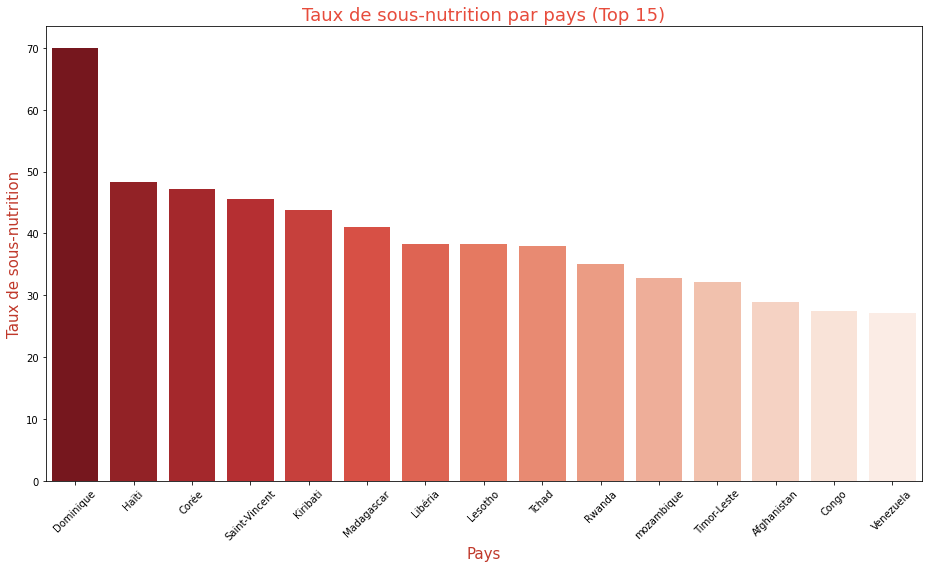

In [31]:
plt.figure(figsize=(13,8))
sns.barplot(x=['Dominique','Haïti','Corée','Saint-Vincent','Kiribati','Madagascar','Libéria','Lesotho','Tchad','Rwanda','mozambique','Timor-Leste','Afghanistan','Congo','Venezuela'], 
            y=top_pop_sous_nutrition['Taux_pop_sous_nutrition'], palette="Reds_r")
plt.xlabel('Pays', fontsize=15, color='#c0392b')
plt.ylabel("Taux de sous-nutrition", fontsize=15, color='#c0392b')
plt.title("Taux de sous-nutrition par pays (Top 15)", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)

for tickLabel in plt.gca().xaxis.get_ticklabels():        
    tickLabel.set_fontsize(10)                             #Taille police axe x
    
plt.tight_layout()



Afficher proportion de la population en sous-nutrition avec un diagramme en secteur :

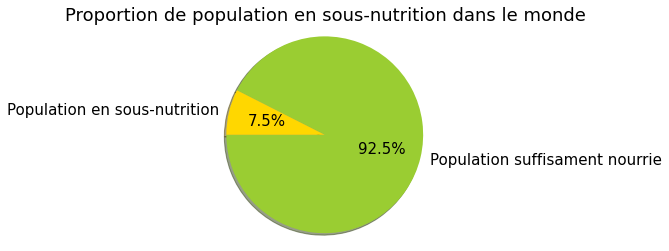

In [32]:
plt.rcParams.update({'font.size' : 15})

labels = 'Population suffisament nourrie', 'Population en sous-nutrition'
sizes = [92.53, 7.47]
colors = ['yellowgreen', 'gold']

plt.title("Proportion de population en sous-nutrition dans le monde")

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')

plt.savefig('PieChart01.png')
plt.show()

### Objectif 3: Le nombre théorique de personnes qui pourraient être nourries

* On parle de malnutrition en cas d'apport quotidien inférieur à 2.400 calories pour moins de 20 grammes de protéines animales
* On parle de sous-nutrition en cas d'apport quotidien inférieur à 2.000 calories pour moins de 10 grammes de protéines animales
 
* Consommation moyenne alimentation en cal/jour = 2500 
* Consommation moyenne de proteines animale en g/jour = 30



Création de la table contenant que la population = 2017 :

In [33]:
population_2017 = population[population["Année"]== 2017]

In [34]:
population_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


Création de la table dispo alimentaire d'origine animale et végétale  :

In [35]:
dispo_alimentaire_animale = dispo_alimentaire_copy[dispo_alimentaire_copy["Origine"] == "animale"]
dispo_alimentaire_vegetale = dispo_alimentaire_copy[dispo_alimentaire_copy["Origine"] == "vegetale"]

Regroupement de ces 2 tables par pays :

In [36]:
dispo_alim_animale_pays = dispo_alimentaire_animale.groupby('Zone').sum()
dispo_alim_vegetale_pays = dispo_alimentaire_vegetale.groupby('Zone').sum()

Merge de ces tables avec la population 2017 :


In [37]:
dispo_alim_animale_pays = dispo_alim_animale_pays.merge(population_2017, on = "Zone")
dispo_alim_vegetale_pays = dispo_alim_vegetale_pays.merge(population_2017, on = "Zone")

Ajout des colonnes disponibilités alimentaire totales :

In [38]:
dispo_alim_animale_pays["Dispo_alim_tot_anim"] = (dispo_alim_animale_pays["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_alim_animale_pays["Valeur"])
dispo_alim_vegetale_pays["Dispo_alim_tot_vege"] = (dispo_alim_vegetale_pays["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_alim_vegetale_pays["Valeur"])

Ajout des colonne disponibilité totale en proteines :

In [39]:
dispo_alim_animale_pays["Dispo_prot_tot_anim"] = dispo_alim_animale_pays["Disponibilité de protéines en quantité (g/personne/jour)"]*dispo_alim_animale_pays["Valeur"]
dispo_alim_vegetale_pays["Dispo_prot_tot_vege"] = dispo_alim_vegetale_pays["Disponibilité de protéines en quantité (g/personne/jour)"]*dispo_alim_vegetale_pays["Valeur"]

Calcul de la disponibilité alimentaire mondiale (cal/Jour) :

In [40]:
dispo_alim_mondiale = pd.DataFrame()  #Création de la DataFrame

dispo_alim_mondiale["Zone"] = dispo_alim_animale_pays["Zone"]              # Assignation des colonnes
dispo_alim_mondiale["Dispo_alim_tot_anim"] = dispo_alim_animale_pays["Dispo_alim_tot_anim"]
dispo_alim_mondiale["Dispo_alim_tot_vege"] = dispo_alim_vegetale_pays["Dispo_alim_tot_vege"]
dispo_alim_mondiale["Dispo_prot_tot_anim"] = dispo_alim_animale_pays["Dispo_prot_tot_anim"]
dispo_alim_mondiale["Dispo_prot_tot_vege"] = dispo_alim_vegetale_pays["Dispo_prot_tot_vege"]

In [41]:
dispo_alim_mondiale["Dispo_alim_tot"] = dispo_alim_mondiale["Dispo_alim_tot_anim"]+dispo_alim_mondiale["Dispo_alim_tot_vege"]
dispo_alim_mondiale["Dispo_prot_tot"] = dispo_alim_mondiale["Dispo_prot_tot_anim"]+dispo_alim_mondiale["Dispo_prot_tot_vege"]

In [42]:
dispo_alim_mondiale = dispo_alim_mondiale.merge(population_2017, on = "Zone")

In [43]:
dispo_alim_mondiale = dispo_alim_mondiale.rename(columns = {'Valeur' : 'Population'})

In [44]:
dispo_alim_mondiale.head()

,Zone,Dispo_alim_tot_anim,Dispo_alim_tot_vege,Dispo_prot_tot_anim,Dispo_prot_tot_vege,Dispo_alim_tot,Dispo_prot_tot,Année,Population
0,Afghanistan,7.839960e+06,6.791003e+07,4.431755e+05,1.671436e+06,7.574999e+07,2.114612e+06,2017,36296.113
1,Afrique du Sud,2.776375e+07,1.444057e+08,2.074585e+06,2.790057e+06,1.721695e+08,4.864642e+06,2017,57009.756
2,Albanie,2.840906e+06,6.353824e+06,1.713485e+05,1.498614e+05,9.194731e+06,3.212099e+05,2017,2884.169
3,Algérie,1.564511e+07,1.206495e+08,1.033902e+06,2.770592e+06,1.362946e+08,3.804494e+06,2017,41389.189
4,Allemagne,8.613006e+07,2.034223e+08,5.082666e+06,3.298071e+06,2.895524e+08,8.380736e+06,2017,82658.409


**Calcul du nombre de personne pouvant être nourrie (pour une conso journalière de 2500 cal/jour) =**

**Dispo alimentaire mondiale (kgCal/pers/jour ) / Conso journalière en (kCal/pers/jour)**

In [45]:
print("Nombre total de personnes pouvant être nourries = ",round(dispo_alim_mondiale["Dispo_alim_tot"].sum() / 2.5))
nb_pers_nutrition = (dispo_alim_mondiale["Dispo_alim_tot"].sum() / 2.5)

Nombre total de personnes pouvant être nourries =  8367593851


Calcul de proportion de personnes pouvant être nourries par rapport à la population actuelle :

In [46]:
proportion_nutrition = round((nb_pers_nutrition)/dispo_alim_mondiale["Population"].sum()*0.1)  # *0.1 car nb_pers_nutrition *100 et population *1000 car en milliers de personnes

print("Proportion de personnes pouvant être nourries par rapport à la population actuelle =",proportion_nutrition,"%")

Proportion de personnes pouvant être nourries par rapport à la population actuelle = 115 %


### Objectif  4 : Afficher la proportion de pays sous le seuil de disponibilité alimentaire

Création de la frame dispo_alimentaire_pays pour avoir une vue par pays :

In [47]:
dispo_alim_pays = dispo_alimentaire_copy.groupby('Zone').sum()

Création des colonnes seuils : 

In [48]:
#création de la colonne permettant de connaitre le nombre de pays sous le seuil de sous_nutrition

dispo_alim_pays["Sous_nutrition(<2000cal/jour)"] = dispo_alim_pays["Disponibilité alimentaire (Kcal/personne/jour)"]<2000

# création de la colonne permettant de connaitre le nombre de pays sous le seuil de Mal_nutrition

dispo_alim_pays["Mal_nutrition(<2400cal/jour)"] = dispo_alim_pays["Disponibilité alimentaire (Kcal/personne/jour)"]<2400

In [49]:
dispo_alim_pays.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Sous_nutrition(<2000cal/jour),Mal_nutrition(<2400cal/jour)
Zone,,,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,False,True
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,False,False
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,False,False
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,False,False
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,False,False


Calcul du nombre de pays en sous_nutrition :

In [50]:
nb_pays_sous_nutrition = dispo_alim_pays["Sous_nutrition(<2000cal/jour)"].sum()
nb_pays_sous_nutrition

2

Calcul du nombre de pays en mal_nutrition :

In [51]:
nb_pays_mal_nutrition = dispo_alim_pays["Mal_nutrition(<2400cal/jour)"].sum() - nb_pays_sous_nutrition
nb_pays_mal_nutrition

27

Afficher la proportion de pays sous le seuil de disponibilité alimentaire : 

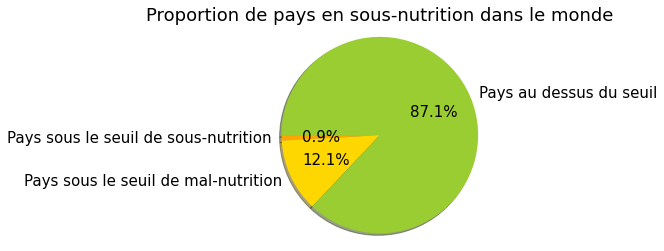

In [52]:
labels = 'Pays sous le seuil de sous-nutrition', 'Pays sous le seuil de mal-nutrition','Pays au dessus du seuil'
sizes = [nb_pays_sous_nutrition,nb_pays_mal_nutrition,195 ]
colors = ['orange','gold','yellowgreen']

plt.title("Proportion de pays en sous-nutrition dans le monde")

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')

plt.savefig('PieChart04.png')
plt.show()

### Objectif 5 : Evaluer la disponibilité mondiale en proteine animale

Nous allons partir de la frame dispo_alim_animale_pays crée précedemment : 

Ajout des colonnes seuil:

In [53]:
dispo_alim_animale_pays["<10g/personne/jour"] = dispo_alim_animale_pays["Disponibilité de protéines en quantité (g/personne/jour)"]<10
dispo_alim_animale_pays["<20g/personne/jour"] = dispo_alim_animale_pays["Disponibilité de protéines en quantité (g/personne/jour)"]<20

In [54]:
dispo_alim_animale_pays.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Production,Semences,Traitement,Variation de stock,Année,Valeur,Dispo_alim_tot_anim,Dispo_prot_tot_anim,<10g/personne/jour,<20g/personne/jour
0,Afghanistan,123.0,0.0,216.0,79.92,15.23,12.21,2631.0,0.0,350.0,...,2280.0,2.0,0.0,0.0,2017,36296.113,7.839960e+06,4.431755e+05,False,True
1,Afrique du Sud,187.0,115.0,487.0,139.63,34.66,36.39,7817.0,1088.0,1049.0,...,7614.0,67.0,0.0,241.0,2017,57009.756,2.776375e+07,2.074585e+06,False,False
2,Albanie,101.0,2.0,985.0,389.05,67.72,59.41,1432.0,10.0,87.0,...,1355.0,0.0,0.0,0.0,2017,2884.169,2.840906e+06,1.713485e+05,False,False
3,Algérie,0.0,1.0,378.0,176.78,22.36,24.98,7120.0,6.0,2731.0,...,4395.0,21.0,0.0,0.0,2017,41389.189,1.564511e+07,1.033902e+06,False,False
4,Allemagne,2087.0,869.0,1042.0,388.70,77.99,61.49,35409.0,22977.0,14711.0,...,43621.0,76.0,156.0,55.0,2017,82658.409,8.613006e+07,5.082666e+06,False,False


Calcul nombre de pays <10g prot/jour/pers :

In [55]:
nb_pays_sous_nutrition_prot = dispo_alim_animale_pays["<10g/personne/jour"].sum()
nb_pays_sous_nutrition_prot

12

Calcul du nombre de pays entre 10 et 20g/jour/pers :

In [56]:
nb_pays_mal_nutrition_prot = dispo_alim_animale_pays["<20g/personne/jour"].sum() - nb_pays_sous_nutrition_prot
nb_pays_mal_nutrition_prot



35

Afficher proportion de la disponibilité alimentaire en proteine animale dans le monde:

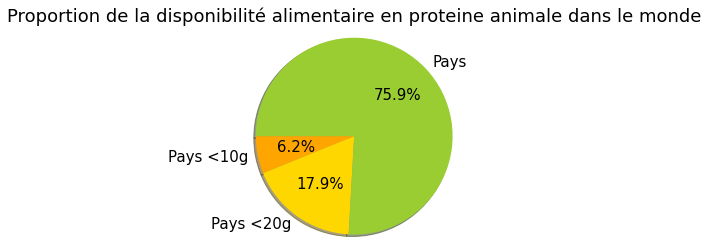

In [57]:
plt.title("Proportion de la disponibilité alimentaire en proteine animale dans le monde")

labels = 'Pays <10g', 'Pays <20g','Pays'
sizes = [12, 35,148]
colors = ['orange','gold','yellowgreen']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')

plt.savefig('PieChart06.png')
plt.show()

Les 10 pays ou la disponibilité de proteines animale est la plus faible :

In [58]:
dispo_alim_animale_pays.sort_values(by = 'Disponibilité de protéines en quantité (g/personne/jour)', ascending = True).head(10)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Production,Semences,Traitement,Variation de stock,Année,Valeur,Dispo_alim_tot_anim,Dispo_prot_tot_anim,<10g/personne/jour,<20g/personne/jour
126,Rwanda,0.0,0.0,63.0,20.50,4.03,5.58,252.0,131.0,33.0,...,350.0,1.0,0.0,0.0,2017,11980.961,7.548005e+05,6.685376e+04,True,True
103,Mozambique,3.0,0.0,103.0,24.11,8.32,6.34,637.0,13.0,105.0,...,545.0,2.0,0.0,0.0,2017,28649.018,2.950849e+06,1.816348e+05,True,True
170,Éthiopie,18.0,0.0,124.0,53.56,8.01,7.69,5190.0,23.0,17.0,...,5195.0,5.0,0.0,0.0,2017,106399.924,1.319359e+07,8.182154e+05,True,True
93,Malawi,1.0,0.0,139.0,29.95,11.26,7.79,496.0,7.0,33.0,...,469.0,2.0,0.0,0.0,2017,17670.196,2.456157e+06,1.376508e+05,True,True
87,Libéria,0.0,0.0,101.0,26.63,6.88,8.14,116.0,0.0,64.0,...,52.0,1.0,0.0,0.0,2017,4702.226,4.749248e+05,3.827612e+04,True,True
62,Guinée-Bissau,0.0,0.0,168.0,40.43,13.31,8.90,70.0,5.0,23.0,...,61.0,0.0,0.0,-12.0,2017,1828.145,3.071284e+05,1.627049e+04,True,True
153,Togo,1.0,1.0,93.0,33.65,5.65,9.04,196.0,71.0,148.0,...,121.0,3.0,0.0,0.0,2017,7698.474,7.159581e+05,6.959420e+04,True,True
164,Zambie,6.0,1.0,106.0,33.65,6.99,9.23,504.0,12.0,87.0,...,430.0,3.0,0.0,0.0,2017,16853.599,1.786481e+06,1.555587e+05,True,True
150,Tchad,7.0,0.0,118.0,40.07,7.36,9.71,537.0,0.0,11.0,...,525.0,0.0,0.0,0.0,2017,15016.753,1.771977e+06,1.458127e+05,True,True
108,Nigéria,899.0,17.0,104.0,38.16,6.26,9.86,7620.0,19.0,3751.0,...,3891.0,18.0,0.0,0.0,2017,190873.244,1.985082e+07,1.882010e+06,True,True


Les 10 pays ou la disponibilité de proteines est la plus forte :

In [59]:
dispo_alim_animale_pays.sort_values(by = 'Disponibilité de protéines en quantité (g/personne/jour)', ascending = False).head(10)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Production,Semences,Traitement,Variation de stock,Année,Valeur,Dispo_alim_tot_anim,Dispo_prot_tot_anim,<10g/personne/jour,<20g/personne/jour
73,Islande,60.0,25.0,1497.0,438.16,105.50,96.48,231.0,1438.0,51.0,...,1617.0,0.0,0.0,0.0,2017,334.393,5.005863e+05,3.226224e+04,False,False
33,Chine - RAS de Hong-Kong,63.0,181.0,1316.0,376.91,91.46,94.40,2970.0,1801.0,4346.0,...,384.0,2.0,0.0,40.0,2017,7306.322,9.615120e+06,6.897168e+05,False,False
94,Maldives,0.0,27.0,820.0,341.99,40.26,85.97,143.0,54.0,67.0,...,132.0,0.0,0.0,0.0,2017,496.402,4.070496e+05,4.267568e+04,False,False
88,Lituanie,491.0,52.0,982.0,444.75,63.88,76.49,1915.0,1419.0,948.0,...,2261.0,4.0,1.0,127.0,2017,2845.414,2.794197e+06,2.176457e+05,False,False
119,Pays-Bas,711.0,253.0,1076.0,473.30,73.61,75.76,8899.0,16705.0,9241.0,...,16943.0,55.0,33.0,-577.0,2017,17021.347,1.831497e+07,1.289537e+06,False,False
52,Finlande,121.0,76.0,1313.0,567.81,101.52,73.03,3290.0,985.0,1194.0,...,3087.0,5.0,6.0,-2.0,2017,5511.371,7.236430e+06,4.024954e+05,False,False
74,Israël,35.0,97.0,817.0,331.48,49.65,72.46,2750.0,26.0,402.0,...,2392.0,36.0,1.0,-15.0,2017,8243.848,6.735224e+06,5.973492e+05,False,False
89,Luxembourg,21.0,4.0,1174.0,413.76,86.30,72.12,243.0,586.0,502.0,...,330.0,0.0,0.0,0.0,2017,591.910,6.949023e+05,4.268855e+04,False,False
10,Australie,628.0,581.0,1051.0,400.75,74.35,71.69,10618.0,6687.0,1726.0,...,15685.0,43.0,2.0,-106.0,2017,24584.620,2.583844e+07,1.762471e+06,False,False
147,Suède,120.0,61.0,1053.0,486.86,73.38,70.81,4866.0,2016.0,2905.0,...,3982.0,6.0,19.0,0.0,2017,9904.896,1.042986e+07,7.013657e+05,False,False


Calcul de la dispo en proteine animale mondiale (g/jour):

In [60]:
 dispo_alim_animale_pays["Dispo_prot_tot_anim"].sum()

229013616.88057

Calcul du nombre de personne pouvant avoir une quantité de proteine animale journaliere normale (=25 g):

In [61]:
round( dispo_alim_animale_pays["Dispo_prot_tot_anim"].sum() / 25)

9160545

**Interprétation : La disponibilité en protéine animale mondiale n'est pas suffisante pour combler le besoin de tous**

Voyons combien de personnes nous pouvons nourrir avec la disponibilité en protéines végétale pour 25g/jour :

In [62]:
dispo_alim_mondiale['Dispo_prot_tot_vege'].sum()

358050056.77891004

In [63]:
round(dispo_alim_mondiale['Dispo_prot_tot_vege'].sum()/25)

14322002

**Interprétation : La disponibilité végétale ne suffit pas non plus pour combler le besoin de tous , même additionnée a la disponibilité en protéines animale**

### Objectif 6 :  Analyser la disponibilité alimentaire mondiale de produits végétaux

Reprenons la Frame de disponibilité alimentaire végétale crée précedement : 

In [64]:
dispo_alim_mondiale.head()

,Zone,Dispo_alim_tot_anim,Dispo_alim_tot_vege,Dispo_prot_tot_anim,Dispo_prot_tot_vege,Dispo_alim_tot,Dispo_prot_tot,Année,Population
0,Afghanistan,7.839960e+06,6.791003e+07,4.431755e+05,1.671436e+06,7.574999e+07,2.114612e+06,2017,36296.113
1,Afrique du Sud,2.776375e+07,1.444057e+08,2.074585e+06,2.790057e+06,1.721695e+08,4.864642e+06,2017,57009.756
2,Albanie,2.840906e+06,6.353824e+06,1.713485e+05,1.498614e+05,9.194731e+06,3.212099e+05,2017,2884.169
3,Algérie,1.564511e+07,1.206495e+08,1.033902e+06,2.770592e+06,1.362946e+08,3.804494e+06,2017,41389.189
4,Allemagne,8.613006e+07,2.034223e+08,5.082666e+06,3.298071e+06,2.895524e+08,8.380736e+06,2017,82658.409


Calcul de la dispo alimentaire végétale mondiale :

In [65]:
dispo_alimentaire_vegetale_mondiale = round(sum(dispo_alim_mondiale["Dispo_alim_tot_vege"]))
dispo_alimentaire_vegetale_mondiale

17260764212

Calcul de la dispo alimentaire animale mondiale :

In [66]:
dispo_alimentaire_animale_mondiale = round(sum(dispo_alim_mondiale["Dispo_alim_tot_anim"]))
dispo_alimentaire_animale_mondiale

3658220416

Calcul du nombre de personne pouvant être nourries par l'alimentation végétale ( pour une conso journaliere de 2500) :

In [67]:
print("Nombre de personne pouvant être nourries par l'alimentation végétale =",round(dispo_alimentaire_vegetale_mondiale / 2.5))

Nombre de personne pouvant être nourries par l'alimentation végétale = 6904305685


Calcul de la proportion de l'alimentation végétale dans le monde :

In [68]:
((dispo_alimentaire_vegetale_mondiale)*100) / dispo_alim_mondiale["Dispo_alim_tot"].sum()

82.51243795766514

Afficher proportion de la disponibilté alimentaire animale par rapport a la vegetale :

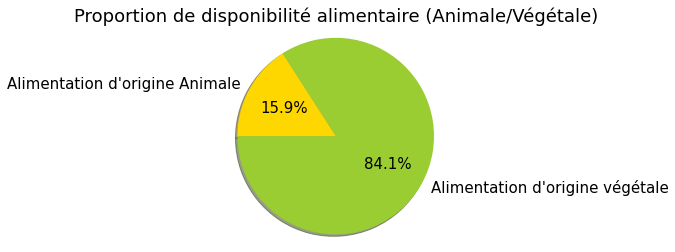

In [69]:
plt.title("Proportion de disponibilité alimentaire (Animale/Végétale)")

labels = "Alimentation d'origine végétale","Alimentation d'origine Animale"
sizes = [84.1, 15.9]
colors = ['yellowgreen', 'gold']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')

plt.savefig('PieChart02.png')
plt.show()

### Objectif 7 : Analyser la proportion de ressources alimentaires déstiné au hommes et aux animaux

Calcul de la quantité alimentaire totale pour animaux :

In [70]:
aliments_pour_animaux = dispo_alimentaire_copy["Aliments pour animaux"].sum()

Calcul de la quantité alimentaire totale pour homme :

In [71]:
aliments_pour_homme = dispo_alimentaire_copy["Nourriture"].sum()

Afficher la proportion de ressources alimentaires déstiné au hommes et aux animaux :

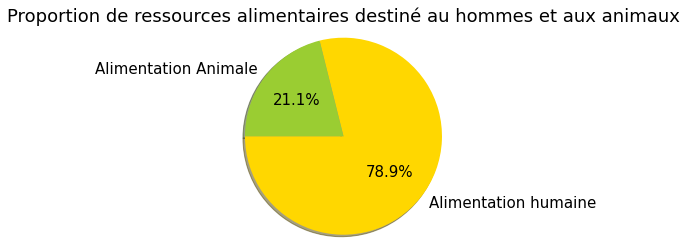

In [72]:
plt.title("Proportion de ressources alimentaires destiné au hommes et aux animaux")

labels = "Alimentation humaine","Alimentation Animale"
sizes = [aliments_pour_homme, aliments_pour_animaux]
colors = ['gold','yellowgreen']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')

plt.savefig('PieChart07.png')
plt.show()

### Objectif 8 : Analyser l'utilisation de la disponibilité intérieure

**Ressource :**

* Disponibilité intérieure = Production + Variation de stock 
* Disponibilité intérieure = Pertes + Aliments pour animaux + Semences + Autres Utilisations + Traitement + Nourriture

Création d'un tableau de proportion de dispo alimentaire :

In [73]:
tableau_proportion = dispo_alimentaire_copy.groupby('Zone').sum()

In [74]:
tableau_proportion

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [75]:
tableau_prop = pd.DataFrame(columns = ['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock'])

In [76]:
tableau_prop['Aliments pour animaux']= tableau_proportion['Aliments pour animaux']
tableau_prop['Autres Utilisations']= tableau_proportion['Autres Utilisations']
tableau_prop['Disponibilité intérieure']= tableau_proportion['Disponibilité intérieure']
tableau_prop['Nourriture']= tableau_proportion['Nourriture']
tableau_prop['Pertes']= tableau_proportion['Pertes']
tableau_prop['Production']= tableau_proportion['Production']
tableau_prop['Semences']= tableau_proportion['Semences']
tableau_prop['Traitement']= tableau_proportion['Traitement']
tableau_prop['Variation de stock']= tableau_proportion['Variation de stock']

In [77]:
tableau_prop = tableau_prop.sum()

Modification des valeur du tableau en pourcentage par rapport à la disponibilité intérieure :

In [78]:
tableau_proportion_pourcent = (tableau_prop *100)/tableau_prop["Disponibilité intérieure"]

In [79]:
tableau_proportion_pourcent

Aliments pour animaux        13.242418
Autres Utilisations           8.782856
Disponibilité intérieure    100.000000
Nourriture                   49.510214
Pertes                        4.606542
Production                  101.631497
Semences                      1.570526
Traitement                   22.384895
Variation de stock           -1.060027
dtype: float64

**Verification de la ressource :**

* Disponibilité intérieure = Production + Variation de stock 
* Disponibilité intérieure = Pertes + Aliments pour animaux + Semences + Autres Utilisations + Traitement + Nourriture

In [80]:
tableau_prop ["Production"]  + tableau_prop["Variation de stock"]

9905278.0

In [81]:
tableau_prop["Pertes"] + tableau_prop ["Aliments pour animaux"] + tableau_prop ["Semences"] + tableau_prop["Autres Utilisations"] + tableau_prop["Traitement"] + tableau_prop ["Nourriture"]

9858592.0

**Conclusion : Les 2 valeurs sont sur un même ordre de grandeur. La ressource est vérifiée**

Affichage de l'Utilisation de la disponibilité intérieure :

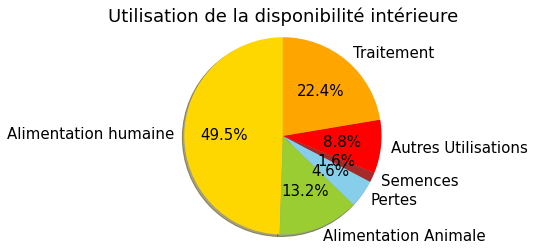

In [82]:
labels = 'Alimentation humaine', 'Alimentation Animale','Pertes','Semences','Autres Utilisations','Traitement'
sizes = [49.51, 13.24,4.60,1.57,8.78,22.38]
colors = ['gold', 'yellowgreen',"skyblue","brown","red","orange"]

plt.title("Utilisation de la disponibilité intérieure")


plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart03.png')
plt.show()

### Objectif 9 : Analyse de l'utilisation des céréales

Création de la liste de céréales :

In [83]:
liste_cereale = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle']

Création de la frame céréale :

In [84]:
df_cereale = dispo_alimentaire_copy.loc[dispo_alimentaire_copy["Produit"].isin(liste_cereale),:] # ,: pour prendre toutes les colonnes

In [85]:
df_cereale = df_cereale.groupby('Zone').sum().reset_index()

In [86]:
df_cereale

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,560.0,0.0,1560.0,179.87,5.52,41.04,7303.0,0.0,1303.0,5494.0,883.0,6350.0,363.0,0.0,-350.0
1,Afrique du Sud,4824.0,0.0,1538.0,180.02,10.20,41.09,15493.0,3777.0,3147.0,9503.0,500.0,14155.0,73.0,593.0,1969.0
2,Albanie,411.0,134.0,1144.0,149.27,6.08,35.49,1145.0,4.0,468.0,474.0,91.0,703.0,22.0,12.0,-22.0
3,Algérie,4337.0,820.0,1678.0,217.67,6.79,49.33,15013.0,2.0,10279.0,8535.0,1024.0,4914.0,253.0,42.0,-180.0
4,Allemagne,26615.0,1013.0,872.0,111.11,3.48,26.39,42158.0,16721.0,11093.0,9191.0,1221.0,47757.0,1027.0,3090.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1053.0,263.0,1379.0,158.68,5.66,34.21,3142.0,619.0,4249.0,1484.0,384.0,55.0,0.0,0.0,-543.0
170,Équateur,847.0,787.0,812.0,95.57,3.12,18.85,3407.0,53.0,877.0,1505.0,138.0,2598.0,39.0,93.0,-15.0
171,États-Unis d'Amérique,140096.0,137181.0,801.0,105.63,3.63,23.70,343006.0,66302.0,13477.0,33810.0,222.0,433686.0,3098.0,28608.0,-37854.0
172,Éthiopie,667.0,3569.0,1362.0,150.46,6.06,36.69,20278.0,24.0,1055.0,14158.0,1168.0,22646.0,385.0,333.0,-3397.0


Création de la frame céréale somme :

In [87]:
df_cereale_sum = df_cereale.sum()
del df_cereale_sum["Zone"]
df_cereale_sum

Aliments pour animaux                                             873535.0
Autres Utilisations                                               234787.0
Disponibilité alimentaire (Kcal/personne/jour)                    195121.0
Disponibilité alimentaire en quantité (kg/personne/an)            23413.58
Disponibilité de matière grasse en quantité (g/personne/jour)      1066.54
Disponibilité de protéines en quantité (g/personne/jour)           5029.91
Disponibilité intérieure                                         2406999.0
Exportations - Quantité                                           425304.0
Importations - Quantité                                           399977.0
Nourriture                                                       1029010.0
Pertes                                                            107120.0
Production                                                       2523345.0
Semences                                                           68538.0
Traitement               

Affichage de la répartition de l'utilisation de céréales :

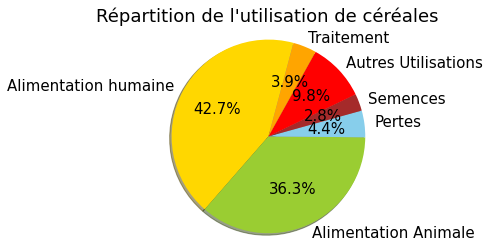

In [88]:
labels = 'Alimentation humaine', 'Alimentation Animale','Pertes','Semences','Autres Utilisations','Traitement'
sizes = [1029010,873535,107120,68538,234787,94589]
colors = ['gold', 'yellowgreen',"skyblue","brown","red","orange"]

plt.title("Répartition de l'utilisation de céréales")


plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=75)

plt.axis('equal')

plt.savefig('PieChart08.png')
plt.show()

#                                               Partie 2

### Objectif 1 : Afficher les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

Création de la frame de la sous_nutrition pour l'année 2017 :

In [89]:
sous_nutrition_copy_2017 = sous_nutrition_copy[sous_nutrition_copy["Année"]==2017]

In [90]:
sous_nutrition_copy_2017.head()

,Zone,Valeur,Année
4,Afghanistan,10.5,2017
10,Afrique du Sud,3.1,2017
16,Albanie,0.1,2017
22,Algérie,1.3,2017
28,Allemagne,0.0,2017


Modification de la colonne valeur en million d'habitants :

In [91]:
sous_nutrition_copy_2017["Valeur"] *= 1000000

C:\Users\NK\AppData\Local\Temp/ipykernel_10896/3867562987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sous_nutrition_copy_2017["Valeur"] *= 1000000


Rename de la colonne Valeur :

In [92]:
sous_nutrition_copy_2017 = sous_nutrition_copy_2017.rename(columns = {'Valeur' : 'pop_sous_nutrition'})

Suppression des lignes pour lesquelles leur valeur est nulle :

In [93]:
sous_nutrition_copy_2017.drop(sous_nutrition_copy_2017.loc[sous_nutrition_copy_2017['pop_sous_nutrition']==0.0].index, inplace=True)

Les 10 Pays ayant le plus grand nombre de personnes en sous_nutrition :

In [94]:
sous_nutrition_copy_2017.sort_values(by = 'pop_sous_nutrition', ascending = False).head(10)

,Zone,pop_sous_nutrition,Année
508,Inde,190100000.0,2017
820,Pakistan,24800000.0,2017
514,Indonésie,23600000.0,2017
772,Nigéria,22800000.0,2017
100,Bangladesh,21500000.0,2017
370,Éthiopie,21100000.0,2017
868,Philippines,15700000.0,2017
952,République-Unie de Tanzanie,13400000.0,2017
946,République populaire démocratique de Corée,12000000.0,2017
580,Kenya,11900000.0,2017


Les 10 Pays ayant le plus petit nombre de personnes en sous_nutrition (hors pays avec valeure nulle) :

In [95]:
sous_nutrition_copy_2017.sort_values(by = 'pop_sous_nutrition', ascending = False).tail(10)

,Zone,pop_sous_nutrition,Année
694,Maurice,50000.0,2017
124,Belize,50000.0,2017
106,Barbade,50000.0,2017
1006,Sao Tomé-et-Principe,50000.0,2017
988,Saint-Vincent-et-les Grenadines,50000.0,2017
382,Fidji,50000.0,2017
466,Guyana,50000.0,2017
880,Polynésie française,50000.0,2017
64,Arménie,50000.0,2017
592,Kiribati,50000.0,2017


Merge de cette nouvelle table avec la table population_2017 :

In [96]:
sous_nutrition_merge = sous_nutrition_copy_2017.merge(population_2017, on = "Zone")

Conversion de la valeur de la population en quantité réelle (*1000 car en milliers d'habitants) :

In [97]:
sous_nutrition_merge["Valeur"]*=1000

Ajout de la colonne proportion_pop en % :

In [98]:
sous_nutrition_merge["Proportion_pop"] = (sous_nutrition_merge["pop_sous_nutrition"]*100) /sous_nutrition_merge["Valeur"]

In [99]:
del sous_nutrition_merge["Année_x"]
del sous_nutrition_merge["Année_y"]

sous_nutrition_merge = sous_nutrition_merge.rename(columns={"Valeur_x": "nb_pers_sous_nutrition", "Valeur_y": "Population"})

Les 10 pays avec la proportion de population en sous-nutrition les plus forte :

In [100]:
sous_nutrition_merge.sort_values(by = 'Proportion_pop', ascending = False).head(10)

,Zone,pop_sous_nutrition,Valeur,Proportion_pop
27,Dominique,50000.0,71458.0,69.971172
41,Haïti,5300000.0,10982366.0,48.259182
82,République populaire démocratique de Corée,12000000.0,25429825.0,47.188685
85,Saint-Vincent-et-les Grenadines,50000.0,109827.0,45.526146
52,Kiribati,50000.0,114158.0,43.798945
57,Madagascar,10500000.0,25570512.0,41.062924
55,Libéria,1800000.0,4702226.0,38.279742
53,Lesotho,800000.0,2091534.0,38.249438
94,Tchad,5700000.0,15016753.0,37.957606
84,Rwanda,4200000.0,11980961.0,35.055619


Les 10 pays avec la proportion de population en sous-nutrition la plus faible (hors pays avec valeur nulle) :

In [101]:
sous_nutrition_merge.sort_values(by = 'Proportion_pop', ascending = False).tail(10)

,Zone,pop_sous_nutrition,Valeur,Proportion_pop
6,Argentine,1500000.0,43937140.0,3.413968
100,Ukraine,1500000.0,44487709.0,3.371718
19,Chili,600000.0,18470439.0,3.248434
58,Malaisie,1000000.0,31104646.0,3.214954
30,Émirats arabes unis,300000.0,9487203.0,3.162154
3,Algérie,1300000.0,41389189.0,3.140917
74,Ouzbékistan,900000.0,31959785.0,2.816039
14,Bulgarie,200000.0,7102444.0,2.815932
56,Macédoine du Nord,50000.0,2081996.0,2.401542
7,Arménie,50000.0,2944791.0,1.697913


###  Objectif 2 : Afficher les pays qui ont le plus bénéficié d’aide depuis 2013

Création de la frame aide_alimentaire_totale groupé par pays :

In [102]:
aide_alimentaire_totale = aide_alimentaire.groupby(["Pays bénéficiaire"]).sum(["Valeur"])

Préparation de la table population_2017 :

In [103]:
population_2017 = population_2017.rename(columns = {'Zone':'Pays bénéficiaire'})

Merge entre l'aide alimentaire et la population_2017 : 

In [104]:
aide_alimentaire_totale = aide_alimentaire_totale.merge(population_2017, on = "Pays bénéficiaire")

In [105]:
aide_alimentaire_totale = aide_alimentaire_totale.rename(columns = {'Valeur_x':'Quantité_aide(T)','Valeur_y':'Population'})

Modification des colonnes de la table : 

In [106]:
aide_alimentaire_totale['Population']*= 1000 #Car en milliers d'habitants

In [107]:
aide_alimentaire_totale['Taux_aide_alim'] = (aide_alimentaire_totale['Quantité_aide(T)']*100)/aide_alimentaire_totale['Population']

Suppression de la colonne Année :

In [108]:
del aide_alimentaire_totale["Année_x"]
aide_alimentaire_totale = aide_alimentaire_totale.rename(columns = {'Année_y' : 'Année'})

In [109]:
aide_alimentaire_totale.head()

,Pays bénéficiaire,Quantité_aide(T),Année,Population,Taux_aide_alim
0,Afghanistan,185452,2017,36296113.0,0.510942
1,Algérie,81114,2017,41389189.0,0.195979
2,Angola,5014,2017,29816766.0,0.016816
3,Bangladesh,348188,2017,159685424.0,0.218046
4,Bhoutan,2666,2017,745563.0,0.357582


Les 10 pays ayant reçu le plus d'aide alimentaire :

In [110]:
aide_alimentaire_totale.sort_values(by = 'Quantité_aide(T)', ascending = False).head(10)

,Pays bénéficiaire,Quantité_aide(T),Année,Population,Taux_aide_alim
50,République arabe syrienne,1858943,2017,17095678.0,10.873760
74,Éthiopie,1381294,2017,106399924.0,1.298210
69,Yémen,1206484,2017,27834819.0,4.334442
61,Soudan du Sud,695248,2017,10910763.0,6.372130
60,Soudan,669784,2017,40813397.0,1.641089
30,Kenya,552836,2017,50221142.0,1.100803
3,Bangladesh,348188,2017,159685424.0,0.218046
59,Somalie,292678,2017,14589179.0,2.006131
53,République démocratique du Congo,288502,2017,81398764.0,0.354430
43,Niger,276344,2017,21602382.0,1.279229


Les 10 pays ayant reçu le moins d'aide alimentaire :

In [111]:
aide_alimentaire_totale.sort_values(by = 'Quantité_aide(T)', ascending = False).tail(10)

,Pays bénéficiaire,Quantité_aide(T),Année,Population,Taux_aide_alim
4,Bhoutan,2666,2017,7.455630e+05,0.357582
64,Tadjikistan,2028,2017,8.880268e+06,0.022837
57,Sao Tomé-et-Principe,1826,2017,2.070890e+05,0.881746
73,Équateur,1362,2017,1.678536e+07,0.008114
11,"Chine, continentale",1298,2017,1.421022e+09,0.000091
72,Égypte,1122,2017,9.644259e+07,0.001163
68,Vanuatu,802,2017,2.855100e+05,0.280901
66,Timor-Leste,116,2017,1.243258e+06,0.009330
24,Géorgie,70,2017,4.008716e+06,0.001746
5,Bolivie (État plurinational de),6,2017,1.119286e+07,0.000054


Les 10 pays ayant le plus fort taux d'aide alimentaire : 

In [112]:
aide_alimentaire_totale.sort_values(by = 'Taux_aide_alim', ascending = False).head(10)

,Pays bénéficiaire,Quantité_aide(T),Année,Population,Taux_aide_alim
50,République arabe syrienne,1858943,2017,17095678.0,10.873760
61,Soudan du Sud,695248,2017,10910763.0,6.372130
17,Djibouti,41296,2017,944099.0,4.374118
69,Yémen,1206484,2017,27834819.0,4.334442
47,Palestine,169684,2017,4747227.0,3.574381
59,Somalie,292678,2017,14589179.0,2.006131
42,Nicaragua,115332,2017,6384846.0,1.806340
65,Tchad,267966,2017,15016753.0,1.784447
60,Soudan,669784,2017,40813397.0,1.641089
51,République centrafricaine,66610,2017,4596023.0,1.449296


Les 10 pays ayant le plus faible taux d'aide alimentaire : 

In [113]:
aide_alimentaire_totale.sort_values(by = 'Taux_aide_alim', ascending = False).tail(10)

,Pays bénéficiaire,Quantité_aide(T),Année,Population,Taux_aide_alim
70,Zambie,3026,2017,1.685360e+07,0.017955
2,Angola,5014,2017,2.981677e+07,0.016816
28,Iraq,3598,2017,3.755278e+07,0.009581
66,Timor-Leste,116,2017,1.243258e+06,0.009330
73,Équateur,1362,2017,1.678536e+07,0.008114
27,Iran (République islamique d'),4686,2017,8.067388e+07,0.005809
24,Géorgie,70,2017,4.008716e+06,0.001746
72,Égypte,1122,2017,9.644259e+07,0.001163
11,"Chine, continentale",1298,2017,1.421022e+09,0.000091
5,Bolivie (État plurinational de),6,2017,1.119286e+07,0.000054


### Objectif 3 : Afficher les pays ayant le plus/le moins de disponibilité/habitant

Nous allons utiliser la frame dispo alimentaire totale par pays :

In [114]:
dispo_alimentaire_pays = dispo_alimentaire_copy.groupby('Zone').sum()

In [115]:
dispo_alimentaire_pays.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0


Les 10 pays ayant la plus grande dispo alimentaire / habitants :

In [116]:
dispo_alimentaire_pays.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
Italie,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
Égypte,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0


Les 10 pays ayant le moins de dispo alimentaire / habitants :

In [117]:
dispo_alimentaire_pays.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)',ascending = True).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0


### Objectif 4 : Données par pays sur map

In [118]:
import geopandas as gpd
import folium as fm

Chargement des coordonnées géometriques des pays du monde dans une frame :

In [119]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  

In [120]:
world.to_csv(r'C:\Users\NK\Desktop\Doc Nathan\Cours DATA\world.csv')

Lecture des fichiers nécessaires :

In [121]:
id_pop = pd.read_csv("C:\\Users\\NK\\Desktop\\Doc Nathan\\Cours DATA\\Projet 4\\id_pop.csv",sep = ';')

In [122]:
pays_iso = pd.read_csv("C:\\Users\\NK\\Desktop\\Doc Nathan\\Cours DATA\\Projet 4\iso_pays.csv",sep =';', encoding = 'latin-1')

Traitement de la table sous_nutrition : 

In [123]:
sous_nutrition_2013 = df_sous_nutrition[df_sous_nutrition['Année']==2013]

In [124]:
sous_nutrition_2013 = sous_nutrition_2013.rename(columns = {'Valeur' : 'nb_pers_sous_nutrition(M)'})

In [125]:
del sous_nutrition_2013['Année']

Traitement de la table aide_alimentaire :

In [126]:
aide_alimentaire_2013 = aide_alimentaire[aide_alimentaire['Année']==2013]

In [127]:
aide_alimentaire_pays = aide_alimentaire_2013.groupby('Pays bénéficiaire').sum()

In [128]:
aide_alimentaire_pays = aide_alimentaire_pays.rename(columns = {'Valeur' : 'qté_aide_alim(T)'})

In [129]:
del aide_alimentaire_pays['Année']

Traitement de la table world : On remplace les code pays à 3 chiffre manquant

In [130]:
world.sort_values(by='iso_a3', ascending= True).head(6)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."


In [131]:
world.iloc[21,3] ='NOR'
world.iloc[167,3] ='SOM'
world.iloc[43,3]='FRA'
world.iloc[160,3]='CYP'

Jointure entres les tables :

In [132]:
id_pop.head()

,ID_pays,Zone,Population
0,AF,Afghanistan,36296.113
1,ZA,Afrique du Sud,57009.756
2,AL,Albanie,2884.169
3,DZ,Algérie,41389.189
4,DE,Allemagne,82658.409


In [133]:
id_pop['Population'] *=1000

In [134]:
pays_iso.head()

,pays,iso_2,iso_3,iso_num
0,Afghanistan,AF,AFG,4
1,Îles Åland,AX,ALA,248
2,Albanie,AL,ALB,8
3,Algérie,DZ,DZA,12
4,Samoa américaines,AS,ASM,16


In [135]:
pays_iso_merge = id_pop.merge(pays_iso,how='left',left_on ='ID_pays',right_on='iso_2')

In [136]:
pays_merge = pays_iso_merge.merge(dispo_alimentaire_pays,how ='left', on = 'Zone')

In [137]:
pays_merge = pays_merge.merge(sous_nutrition_2013,how='left', on = 'Zone')

In [138]:
pays_merge = pays_merge.merge(aide_alimentaire_pays, how='left' ,left_on = 'Zone', right_on = 'Pays bénéficiaire')

In [139]:
pays_merge.head()

,ID_pays,Zone,Population,pays,iso_2,iso_3,iso_num,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,nb_pers_sous_nutrition(M),qté_aide_alim(T)
0,AF,Afghanistan,36296113.0,Afghanistan,AF,AFG,4.0,768.0,415.0,2087.0,...,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,8.6,128238.0
1,ZA,Afrique du Sud,57009756.0,Afrique du Sud,ZA,ZAF,710.0,5309.0,876.0,3020.0,...,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2.2,NaN
2,AL,Albanie,2884169.0,Albanie,AL,ALB,8.0,660.0,174.0,3188.0,...,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,0.1,NaN
3,DZ,Algérie,41389189.0,Algérie,DZ,DZA,12.0,4352.0,1707.0,3293.0,...,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,1.3,35234.0
4,DE,Allemagne,82658409.0,Allemagne,DE,DEU,276.0,30209.0,7711.0,3503.0,...,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,NaN,NaN


In [140]:
world.head(100)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ..."
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
97,3068243,Asia,Mongolia,MNG,37000.0,"POLYGON ((87.75126 49.29720, 88.80557 49.47052..."
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


In [141]:
world_info = world.merge(pays_merge,how = 'left' , left_on='iso_a3', right_on='iso_3')

In [142]:
world_info.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ID_pays,Zone,Population,pays,...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,nb_pers_sous_nutrition(M),qté_aide_alim(T)
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,Fidji,877459.0,Fidji,...,274.0,485.0,550.0,13.0,2431.0,1.0,1663.0,-138.0,0.05,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",EH,Sahara occidental,552615.0,Sahara occidental,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,Canada,36732095.0,Canada,...,54771.0,19422.0,33945.0,2118.0,127553.0,2227.0,11336.0,-12641.0,NaN,NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,États-Unis d'Amérique,325084756.0,États-Unis,...,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,NaN,NaN


**Carte de sous_nutrition:**

In [143]:
world_sous_nutrition = world_info.dropna(subset = ['nb_pers_sous_nutrition(M)'])

In [144]:
world_sous_nutrition['nb_pers_sous_nutrition(M)']*= 1000000

C:\Users\NK\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [145]:
world_sous_nutrition["Taux_pop_sous_nutrition"] = (world_sous_nutrition["nb_pers_sous_nutrition(M)"]*100)/world_sous_nutrition["Population"]

In [146]:
population_map = fm.Map()

fm.Choropleth(
    geo_data=world_sous_nutrition,
    name="sous-nutrition",
    data=world_sous_nutrition,
    columns=["name","Taux_pop_sous_nutrition"],
    key_on="feature.properties.name",                #"feature.properties.name"
    fill_color="OrRd",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Taux de sous-nutrition par pays",
).add_to(population_map)

fm.LayerControl().add_to(population_map)

population_map

**Carte de disponibilité alimentaire :**

In [147]:
world_dispo_alim = world_info.dropna(subset = ['Disponibilité alimentaire (Kcal/personne/jour)'])

In [148]:
dispo_alimentaire_map = fm.Map()

fm.Choropleth(
    geo_data=world_dispo_alim ,
    name="aide-alimentaire",
    data=world_dispo_alim ,
    columns=["name","Disponibilité alimentaire (Kcal/personne/jour)"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Disponibilité alimentaire (Kcal/personne/jour)",
).add_to(dispo_alimentaire_map)

fm.LayerControl().add_to(dispo_alimentaire_map)

dispo_alimentaire_map

**Carte de la balance commerciale alimentaire :** 

In [149]:
world_commerce = world_info

In [150]:
world_commerce['balance_commerciale'] = world_commerce['Exportations - Quantité']-world_commerce['Importations - Quantité']

In [151]:
world_commerce = world_info.dropna(subset = ['Exportations - Quantité'])
world_commerce = world_info.dropna(subset = ['Importations - Quantité'])
world_commerce = world_info.dropna(subset = ['balance_commerciale'])

In [152]:
world_import_map = fm.Map()

fm.Choropleth(
    geo_data=world_commerce,
    name="aide-alimentaire",
    data=world_commerce,
    columns=["name",'balance_commerciale'],
    key_on="feature.properties.name",
    fill_color="Spectral",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Balance commerciale alimentaire",
).add_to(world_import_map)

fm.LayerControl().add_to(world_import_map)

world_import_map